### Load Modules

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Prepare/collect data

In [5]:
import os

path = os.listdir('/kaggle/input/reduced-mri-scans-data/dataset/train-data')
classes = {'zero':0, 'one':1}

In [6]:
import cv2
X = []
Y = []
for cls in classes:
    pth = '/kaggle/input/reduced-mri-scans-data/dataset/train-data/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [7]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [8]:
np.unique(Y)

array([0, 1])

In [9]:
pd.Series(Y).value_counts()

1    7922
0    5030
Name: count, dtype: int64

In [10]:
X.shape, X_updated.shape

((12952, 200, 200), (12952, 40000))

### Visualize data

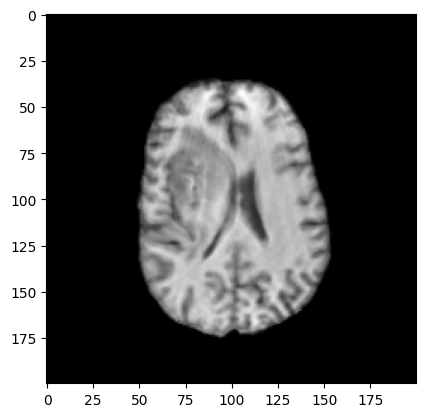

In [11]:
plt.imshow(X[785], cmap='gray')

### Prepare data

In [12]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(12952, 40000)

### Split Data

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.30)

In [14]:
xtrain.shape, xtest.shape

((9066, 40000), (3886, 40000))

### Feature Scaling

In [15]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


### Feature Selection: PCA

In [16]:
from sklearn.decomposition import PCA

In [17]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
pca_train = pca.fit_transform(xtrain)
pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(9066, 40000) (3886, 40000)


In [18]:
print(pca_train.shape, pca_test.shape)
# print(pca.n_components_)
# print(pca.n_features_)

(9066, 40000) (3886, 40000)


### Train Model

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [29]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)


LogisticRegression(C=0.1)

### Evaluation

In [21]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 0.857379219060225
Testing Score: 0.7905301080802882


### Prediction

In [22]:
pred=lg.predict(xtest)

In [23]:
misclassified=np.where(ytest!=pred)
misclassified

(array([   3,   18,   25,   27,   30,   36,   41,   42,   45,   58,   60,
          62,   63,   65,   67,   69,   80,   81,   84,   89,   95,   96,
          99,  101,  114,  115,  127,  129,  132,  133,  142,  144,  148,
         149,  152,  153,  155,  157,  158,  160,  179,  190,  192,  208,
         209,  210,  222,  224,  234,  238,  243,  244,  249,  260,  265,
         267,  269,  270,  277,  283,  297,  301,  314,  315,  320,  340,
         342,  344,  345,  355,  358,  359,  370,  371,  380,  385,  387,
         389,  393,  397,  400,  403,  406,  409,  417,  419,  420,  424,
         434,  435,  436,  441,  449,  450,  459,  460,  461,  466,  483,
         486,  493,  500,  504,  508,  509,  514,  517,  519,  526,  527,
         529,  530,  534,  537,  542,  543,  544,  545,  547,  553,  555,
         556,  565,  566,  571,  574,  579,  585,  586,  587,  598,  607,
         609,  612,  622,  624,  630,  635,  638,  647,  648,  649,  650,
         652,  653,  658,  659,  673, 

In [24]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  814
0 1


### TEST MODEL

In [25]:
dec = {0:'Zero methylation', 1:'One methylation'}

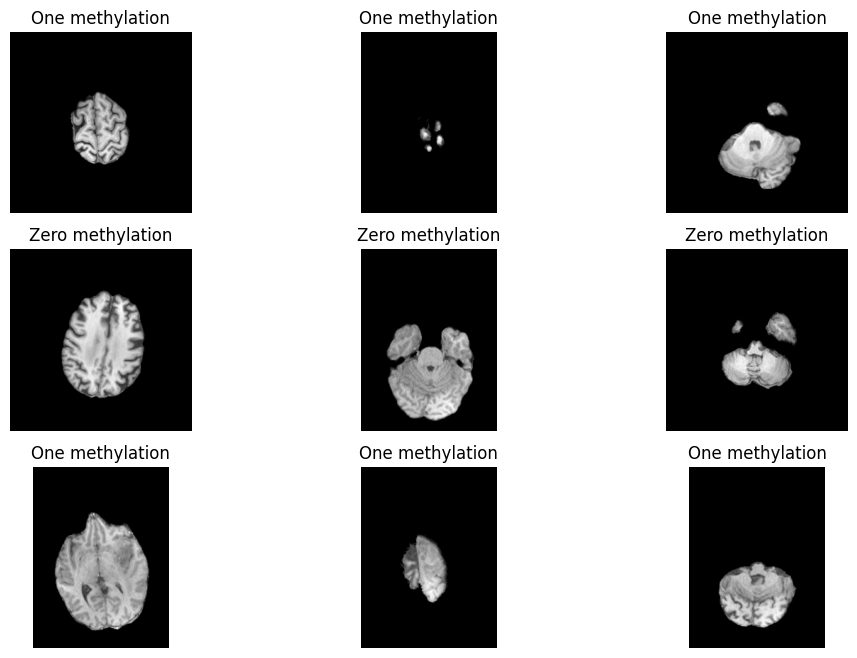

In [26]:
plt.figure(figsize=(12,8))
p = os.listdir('/kaggle/input/reduced-mri-scans-data/dataset/test-data/test/')
c=1
for i in os.listdir('/kaggle/input/reduced-mri-scans-data/dataset/test-data/test/')[100:109]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('/kaggle/input/reduced-mri-scans-data/dataset/test-data/test/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = lg.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Compute evaluation metrics
accuracy = accuracy_score(ytest, pred)
precision = precision_score(ytest, pred)
recall = recall_score(ytest, pred)
f1 = f1_score(ytest, pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7905301080802882
Precision: 0.7979174701118396
Recall: 0.8770665536244171
F1 Score: 0.83562197092084
